### Imports

In [1]:
!pip install celltypist
import celltypist
from celltypist import models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.8 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=87c6538f6b09ce573fa01e68cb874d8cbcff75c2328e2487afc0424628dcf699
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info


In [2]:
import scanpy as sc
from scipy.sparse import csr_matrix

In [3]:
import anndata as ad
import pandas as pd
import numpy as np

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = "/content/drive/MyDrive/Programmable Biology Group/Shrey/Oogonia_Shrey/Revisions/may_2024"

### Cell type annotation using custom model

#### Annotation for markers only

In [ ]:
model = models.Model.load(model = path + '/CellTypist/06-25-2024-00:12:30germ_immune_somatic_subsampled_10k_celltypist_model.pkl')
model

CellTypist model with 35 cell types and 5365 features
    date: 2024-06-25 00:12:30.682535
    cell types: B cell, CoelEpi, ..., tissue_repair mac
    features: A1BG, A1CF, ..., ZYX

In [ ]:
model.cell_types

array(['B cell', 'CoelEpi', 'FetalLeydig', 'GC', 'GC_mitotic', 'ILC prec',
       'MEMP', 'Mesenchymal_LHX9', 'NK', 'NMP', 'PGC', 'SIGLEC15_ftM',
       'Sertoli', 'Supporting', 'TREM2_ftM', 'cDC1', 'cDC2', 'early T',
       'mast', 'mega', 'mono', 'mono_DC prec', 'myeloid prog', 'neutro',
       'oocyte', 'oogonia_STRA8', 'oogonia_meiotic', 'pDC prec',
       'preGranulosa', 'pre_B', 'pre_oocyte', 'pre_pro_B',
       'pre_spermatogonia', 'pro_B', 'tissue_repair mac'], dtype='<U17')

In [ ]:
all_genes = pd.read_csv(path + "/june2024_all_samples_counts_gene_names.csv", index_col=['Geneid'])
all_genes

,F3_D3,F3_ZGLP1+AR-V7+ANHX,F3_ZGLP1,F3_AR-V7,F3_ANHX,F3_ZGLP1+AR-V7,F3_D5_1,PGP1_D3,PGP1_ZGLP1+AR-V7+ANHX,PGP1_ZGLP1,...,hPGCLC.d11,hPGCLC.d0.5,hPGCLC.d0.6,hiPSC,hPGCLC.d82.5,hPGCLC.d68,hPGCLC.d72,hPGCLC.d76,hPGCLC.d82.6,hPGCLC.d62
Geneid,,,,,,,,,,,,,,,,,,,,,
TSPAN6,4770,6717,3523,4239,5371,6920,3138,3849,1414,596,...,1629,1886,1955,837,2665,2959,2525,2059,1749,2703
TNMD,17,51,57,31,375,16,58,15,16,5,...,0,0,1,5,0,1,0,0,0,0
DPM1,1962,5888,2554,3039,7264,3339,5791,3657,3031,582,...,543,598,770,561,724,1038,947,672,781,801
SCYL3,104,148,148,181,288,188,147,246,85,70,...,29,23,18,14,31,37,54,56,18,52
FIRRM,107,169,145,145,222,154,144,270,123,92,...,36,46,44,41,71,104,71,88,94,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F8A2,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
LOC127898563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LOC128462377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
markers = pd.read_csv(path + "/markers-2023-12-22-2.csv")
markers

,Marker,Group
0,DDX4,Validation
1,LHX8,TF
2,ZNF281,TF
3,SOHLH1,TF
4,ZGLP1,TF
...,...,...
65,BMP15,Oocyte
66,NPM2,Oocyte
67,ZP3,Oocyte
68,GRIK2,Oocyte


In [ ]:
marker_genes = all_genes[all_genes.index.isin(markers['Marker'])]
marker_genes

,F3_D3,F3_ZGLP1+AR-V7+ANHX,F3_ZGLP1,F3_AR-V7,F3_ANHX,F3_ZGLP1+AR-V7,F3_D5_1,PGP1_D3,PGP1_ZGLP1+AR-V7+ANHX,PGP1_ZGLP1,...,hPGCLC.d11,hPGCLC.d0.5,hPGCLC.d0.6,hiPSC,hPGCLC.d82.5,hPGCLC.d68,hPGCLC.d72,hPGCLC.d76,hPGCLC.d82.6,hPGCLC.d62
Geneid,,,,,,,,,,,,,,,,,,,,,
CD38,108,135,45,77,394,42,76,73,51,96,...,583,467,400,2,183,245,296,421,384,521
TKTL1,422,1503,364,589,1520,928,1240,50,187,18,...,6,17,1,1,28,25,27,55,26,24
PAX6,11,37,38,32,74,15,11,39,25,20,...,0,0,0,0,0,0,0,0,0,0
SYNE2,1644,2055,1431,4129,4406,1288,1445,3302,958,1098,...,278,368,274,68,442,596,522,653,539,894
SPO11,31,10,49,47,60,34,21,80,22,42,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZGLP1,7,442,928,29,20,637,598,41,289,348,...,4,28,18,7,47,55,76,34,21,30
ANHX,5,2361,13,14,2728,2,1461,21,503,19,...,0,0,0,0,253,158,215,241,53,19
MEIOSIN,23,15,43,86,66,12,8,65,18,53,...,0,0,0,1,17,3,5,11,4,4


In [ ]:
normalized_counts = np.log1p(all_genes)
marker_genes = pd.DataFrame(normalized_counts, index=all_genes.index, columns=all_genes.columns)
marker_genes = marker_genes.T
total_counts_per_cell = marker_genes.sum(axis=1)
marker_genes = (marker_genes.div(total_counts_per_cell, axis=0)) * 10000
marker_genes

Geneid,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,PRRC2B,UGT1A3,UGT1A5,LOC127933115,LOC127903862,F8A2,LOC127898563,LOC128462377,LOC127898562,F8A1
F3_D3,0.762131,0.260066,0.682224,0.418748,0.421283,0.243662,0.427713,0.636277,0.609933,0.557536,...,0.369883,0.062367,0.124734,0.0,0.0,0.000000,0.0,0.0,0.0,0.254923
F3_ZGLP1+AR-V7+ANHX,0.814587,0.365233,0.802413,0.462539,0.474727,0.000000,0.415939,0.708670,0.705006,0.648993,...,0.397846,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.311256
F3_ZGLP1,0.682824,0.339470,0.655942,0.418350,0.416650,0.304117,0.418350,0.626099,0.570090,0.538222,...,0.389883,0.057950,0.207748,0.0,0.0,0.000000,0.0,0.0,0.0,0.318253
F3_AR-V7,0.676213,0.280590,0.649277,0.421322,0.403478,0.285498,0.401229,0.616782,0.555786,0.503626,...,0.432133,0.130302,0.168354,0.0,0.0,0.000000,0.0,0.0,0.0,0.275365
F3_ANHX,0.614676,0.424356,0.636279,0.405523,0.386969,0.254442,0.413704,0.523138,0.560845,0.504981,...,0.341418,0.049606,0.139261,0.0,0.0,0.000000,0.0,0.0,0.0,0.221213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hPGCLC.d68,1.180565,0.102378,1.025933,0.537275,0.687394,0.434896,0.000000,0.685981,0.709558,0.746812,...,0.611945,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.475431
hPGCLC.d72,1.078376,0.000000,0.943478,0.551595,0.588668,0.493259,0.095409,0.675194,0.656668,0.727214,...,0.637954,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.538476
hPGCLC.d76,1.078007,0.000000,0.919958,0.571189,0.634140,0.573646,0.195851,0.591901,0.647749,0.761350,...,0.690893,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.454752
hPGCLC.d82.6,1.116774,0.000000,0.996306,0.440352,0.681050,0.440352,0.000000,0.619622,0.688721,0.774956,...,0.708317,0.000000,0.000000,0.0,0.0,0.103663,0.0,0.0,0.0,0.481395


In [ ]:
print(marker_genes.sum(axis=1))

F3_D3                  10000.0
F3_ZGLP1+AR-V7+ANHX    10000.0
F3_ZGLP1               10000.0
F3_AR-V7               10000.0
F3_ANHX                10000.0
                        ...   
hPGCLC.d68             10000.0
hPGCLC.d72             10000.0
hPGCLC.d76             10000.0
hPGCLC.d82.6           10000.0
hPGCLC.d62             10000.0
Length: 181, dtype: float64


In [ ]:
marker_genes.to_csv(path + "/CellTypist/pgb_counts_marker_genes_for_finetuned_celltypist_preds.csv")

In [ ]:
marker_gene_preds = celltypist.annotate(path + '/CellTypist/pgb_counts_marker_genes_for_finetuned_celltypist_preds.csv',
                                        model = path + '/CellTypist/06-25-2024-00:12:30germ_immune_somatic_subsampled_10k_celltypist_model.pkl',
                                        majority_voting = True,
                                        use_GPU=True)

In [ ]:
marker_gene_preds.predicted_labels

,predicted_labels,over_clustering,majority_voting
F3_D3,oogonia_STRA8,5,oogonia_STRA8
F3_ZGLP1+AR-V7+ANHX,oogonia_STRA8,5,oogonia_STRA8
F3_ZGLP1,tissue_repair mac,8,oogonia_STRA8
F3_AR-V7,oogonia_STRA8,8,oogonia_STRA8
F3_ANHX,oogonia_STRA8,8,oogonia_STRA8
...,...,...,...
hPGCLC.d68,PGC,0,PGC
hPGCLC.d72,pre_spermatogonia,6,PGC
hPGCLC.d76,PGC,6,PGC
hPGCLC.d82.6,PGC,6,PGC


In [ ]:
marker_gene_preds.predicted_labels.to_csv(path + "/CellTypist/finetuned_celltypist_marker_genes_preds.csv")

In [ ]:
adata = marker_gene_preds.to_adata()

In [ ]:
cell_types = pd.DataFrame(marker_gene_preds.predicted_labels.index)
cell_types = cell_types.rename(columns={  0: 'cell_type'})
cell_types

,cell_type
0,F3_D3
1,F3_ZGLP1+AR-V7+ANHX
2,F3_ZGLP1
3,F3_AR-V7
4,F3_ANHX
...,...
176,hPGCLC.d68
177,hPGCLC.d72
178,hPGCLC.d76
179,hPGCLC.d82.6


In [ ]:
adata.obs['cell_type'] = cell_types['cell_type'].tolist()
adata.obs.index = ["cell" + str(i) for i in range(1, len(cell_types) + 1)]
adata.obs

,predicted_labels,over_clustering,majority_voting,conf_score,cell_type
cell1,oogonia_STRA8,5,oogonia_STRA8,0.999999,F3_D3
cell2,oogonia_STRA8,5,oogonia_STRA8,0.999997,F3_ZGLP1+AR-V7+ANHX
cell3,tissue_repair mac,8,oogonia_STRA8,1.000000,F3_ZGLP1
cell4,oogonia_STRA8,8,oogonia_STRA8,1.000000,F3_AR-V7
cell5,oogonia_STRA8,8,oogonia_STRA8,1.000000,F3_ANHX
...,...,...,...,...,...
cell177,PGC,0,PGC,0.998845,hPGCLC.d68
cell178,pre_spermatogonia,6,PGC,0.996943,hPGCLC.d72
cell179,PGC,6,PGC,0.999731,hPGCLC.d76
cell180,PGC,6,PGC,0.999883,hPGCLC.d82.6


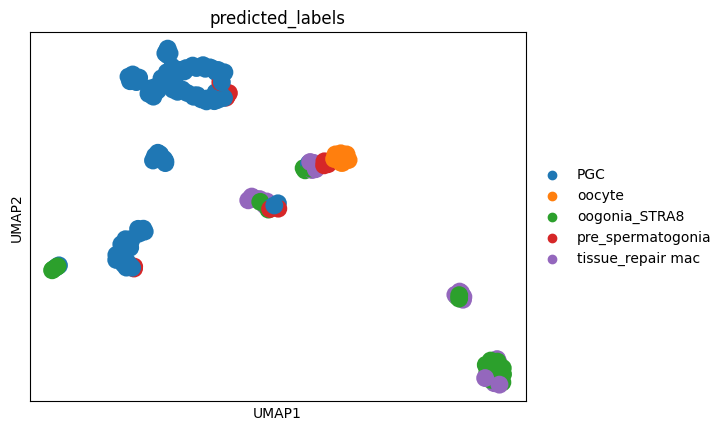

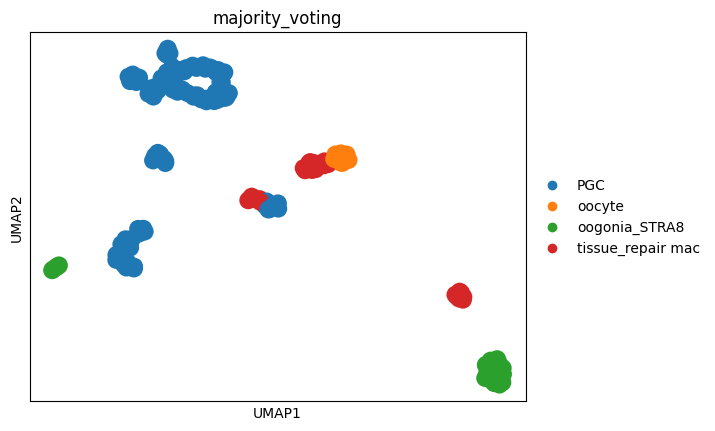

In [ ]:
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['predicted_labels'], legend_loc = 'right margin')
sc.pl.umap(adata, color = ['majority_voting'], legend_loc = 'right margin')

#### Annotation for all genes

In [19]:
model = models.Model.load(model = path + '/CellTypist/06-25-2024-00:12:30germ_immune_somatic_subsampled_10k_celltypist_model.pkl')
model

CellTypist model with 35 cell types and 5365 features
    date: 2024-06-25 00:12:30.682535
    cell types: B cell, CoelEpi, ..., tissue_repair mac
    features: A1BG, A1CF, ..., ZYX

In [20]:
model.cell_types

array(['B cell', 'CoelEpi', 'FetalLeydig', 'GC', 'GC_mitotic', 'ILC prec',
       'MEMP', 'Mesenchymal_LHX9', 'NK', 'NMP', 'PGC', 'SIGLEC15_ftM',
       'Sertoli', 'Supporting', 'TREM2_ftM', 'cDC1', 'cDC2', 'early T',
       'mast', 'mega', 'mono', 'mono_DC prec', 'myeloid prog', 'neutro',
       'oocyte', 'oogonia_STRA8', 'oogonia_meiotic', 'pDC prec',
       'preGranulosa', 'pre_B', 'pre_oocyte', 'pre_pro_B',
       'pre_spermatogonia', 'pro_B', 'tissue_repair mac'], dtype='<U17')

In [21]:
all_genes = pd.read_csv(path + "/june2024_all_samples_counts_gene_names.csv", index_col=['Geneid'])
normalized_counts = np.log1p(all_genes)
all_genes = pd.DataFrame(normalized_counts, index=all_genes.index, columns=all_genes.columns)
all_genes = all_genes.T
total_counts_per_cell = all_genes.sum(axis=1)
all_genes = (all_genes.div(total_counts_per_cell, axis=0)) * 10000
all_genes

Geneid,TSPAN6,TNMD,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,...,PRRC2B,UGT1A3,UGT1A5,LOC127933115,LOC127903862,F8A2,LOC127898563,LOC128462377,LOC127898562,F8A1
F3_D3,0.762131,0.260066,0.682224,0.418748,0.421283,0.243662,0.427713,0.636277,0.609933,0.557536,...,0.369883,0.062367,0.124734,0.0,0.0,0.000000,0.0,0.0,0.0,0.254923
F3_ZGLP1+AR-V7+ANHX,0.814587,0.365233,0.802413,0.462539,0.474727,0.000000,0.415939,0.708670,0.705006,0.648993,...,0.397846,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.311256
F3_ZGLP1,0.682824,0.339470,0.655942,0.418350,0.416650,0.304117,0.418350,0.626099,0.570090,0.538222,...,0.389883,0.057950,0.207748,0.0,0.0,0.000000,0.0,0.0,0.0,0.318253
F3_AR-V7,0.676213,0.280590,0.649277,0.421322,0.403478,0.285498,0.401229,0.616782,0.555786,0.503626,...,0.432133,0.130302,0.168354,0.0,0.0,0.000000,0.0,0.0,0.0,0.275365
F3_ANHX,0.614676,0.424356,0.636279,0.405523,0.386969,0.254442,0.413704,0.523138,0.560845,0.504981,...,0.341418,0.049606,0.139261,0.0,0.0,0.000000,0.0,0.0,0.0,0.221213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hPGCLC.d68,1.180565,0.102378,1.025933,0.537275,0.687394,0.434896,0.000000,0.685981,0.709558,0.746812,...,0.611945,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.475431
hPGCLC.d72,1.078376,0.000000,0.943478,0.551595,0.588668,0.493259,0.095409,0.675194,0.656668,0.727214,...,0.637954,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.538476
hPGCLC.d76,1.078007,0.000000,0.919958,0.571189,0.634140,0.573646,0.195851,0.591901,0.647749,0.761350,...,0.690893,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.454752
hPGCLC.d82.6,1.116774,0.000000,0.996306,0.440352,0.681050,0.440352,0.000000,0.619622,0.688721,0.774956,...,0.708317,0.000000,0.000000,0.0,0.0,0.103663,0.0,0.0,0.0,0.481395


In [22]:
print(all_genes.sum(axis=1))

F3_D3                  10000.0
F3_ZGLP1+AR-V7+ANHX    10000.0
F3_ZGLP1               10000.0
F3_AR-V7               10000.0
F3_ANHX                10000.0
                        ...   
hPGCLC.d68             10000.0
hPGCLC.d72             10000.0
hPGCLC.d76             10000.0
hPGCLC.d82.6           10000.0
hPGCLC.d62             10000.0
Length: 181, dtype: float64


In [23]:
all_genes.to_csv(path + "/CellTypist/pbg_counts_all_genes_for_finetuned_celltypist_preds.csv")

In [26]:
all_gene_preds = celltypist.annotate(path + '/CellTypist/pbg_counts_all_genes_for_finetuned_celltypist_preds.csv',
                                     model = path + '/CellTypist/06-25-2024-00:12:30germ_immune_somatic_subsampled_10k_celltypist_model.pkl',
                                     majority_voting = True,
                                     use_GPU=True)

In [27]:
all_gene_preds.predicted_labels

,predicted_labels,over_clustering,majority_voting
F3_D3,oogonia_STRA8,5,oogonia_STRA8
F3_ZGLP1+AR-V7+ANHX,oogonia_STRA8,5,oogonia_STRA8
F3_ZGLP1,tissue_repair mac,8,oogonia_STRA8
F3_AR-V7,oogonia_STRA8,8,oogonia_STRA8
F3_ANHX,oogonia_STRA8,8,oogonia_STRA8
...,...,...,...
hPGCLC.d68,PGC,0,PGC
hPGCLC.d72,pre_spermatogonia,6,PGC
hPGCLC.d76,PGC,6,PGC
hPGCLC.d82.6,PGC,6,PGC


In [28]:
all_gene_preds.predicted_labels.to_csv(path + "/CellTypist/finetuned_celltypist_all_genes_preds.csv")

In [29]:
adata = all_gene_preds.to_adata()

In [30]:
cell_types = pd.DataFrame(all_gene_preds.predicted_labels.index)
cell_types = cell_types.rename(columns={  0: 'cell_type'})
cell_types

,cell_type
0,F3_D3
1,F3_ZGLP1+AR-V7+ANHX
2,F3_ZGLP1
3,F3_AR-V7
4,F3_ANHX
...,...
176,hPGCLC.d68
177,hPGCLC.d72
178,hPGCLC.d76
179,hPGCLC.d82.6


In [31]:
adata.obs['cell_type'] = cell_types['cell_type'].tolist()
adata.obs.index = ["cell" + str(i) for i in range(1, len(cell_types) + 1)]
adata.obs

,predicted_labels,over_clustering,majority_voting,conf_score,cell_type
cell1,oogonia_STRA8,5,oogonia_STRA8,0.999999,F3_D3
cell2,oogonia_STRA8,5,oogonia_STRA8,0.999997,F3_ZGLP1+AR-V7+ANHX
cell3,tissue_repair mac,8,oogonia_STRA8,1.000000,F3_ZGLP1
cell4,oogonia_STRA8,8,oogonia_STRA8,1.000000,F3_AR-V7
cell5,oogonia_STRA8,8,oogonia_STRA8,1.000000,F3_ANHX
...,...,...,...,...,...
cell177,PGC,0,PGC,0.998845,hPGCLC.d68
cell178,pre_spermatogonia,6,PGC,0.996943,hPGCLC.d72
cell179,PGC,6,PGC,0.999731,hPGCLC.d76
cell180,PGC,6,PGC,0.999883,hPGCLC.d82.6


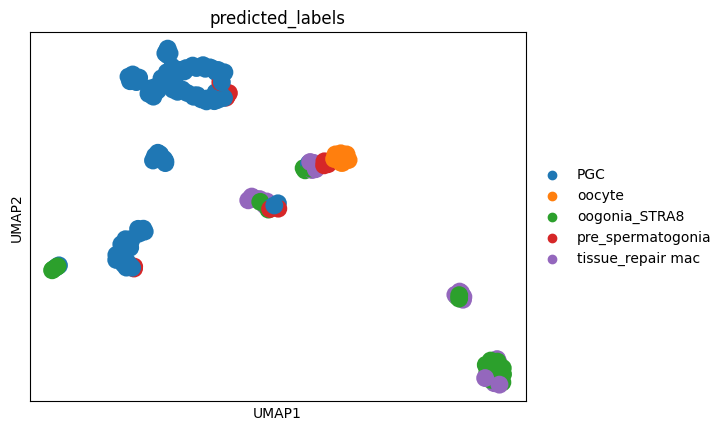

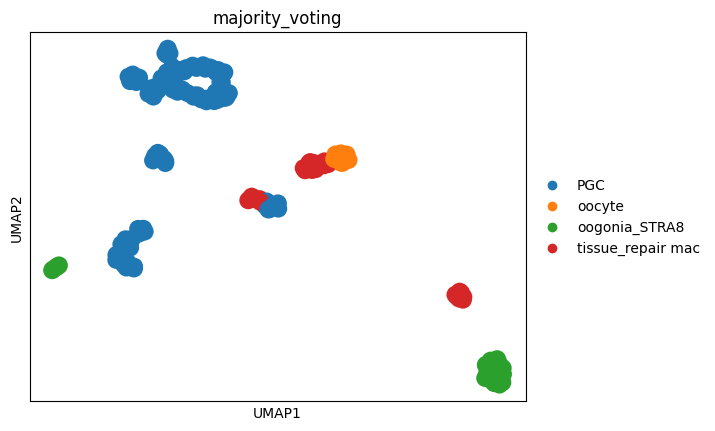

In [32]:
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['predicted_labels'], legend_loc = 'right margin')
sc.pl.umap(adata, color = ['majority_voting'], legend_loc = 'right margin')

### View probabilities and heatmap

In [42]:
clf = celltypist.classifier.Classifier(filename = path + '/CellTypist/pbg_counts_all_genes_for_finetuned_celltypist_preds.csv',
                                       model = path + '/CellTypist/06-25-2024-00:12:30germ_immune_somatic_subsampled_10k_celltypist_model.pkl')
clf

In [46]:
cell_results = clf.celltype()
cell_results

CellTypist prediction result for 181 query cells
    predicted_labels: data frame with 1 column ('predicted_labels')
    decision_matrix: data frame with 181 query cells and 35 cell types
    probability_matrix: data frame with 181 query cells and 35 cell types
    adata: AnnData object referred

In [49]:
cell_results.predicted_labels

,predicted_labels
F3_D3,tissue_repair mac
F3_ZGLP1+AR-V7+ANHX,tissue_repair mac
F3_ZGLP1,tissue_repair mac
F3_AR-V7,tissue_repair mac
F3_ANHX,pre_oocyte
...,...
hPGCLC.d68,tissue_repair mac
hPGCLC.d72,tissue_repair mac
hPGCLC.d76,tissue_repair mac
hPGCLC.d82.6,PGC


In [50]:
prob_mat = cell_results.probability_matrix
prob_mat

,B cell,CoelEpi,FetalLeydig,GC,GC_mitotic,ILC prec,MEMP,Mesenchymal_LHX9,NK,NMP,...,oogonia_STRA8,oogonia_meiotic,pDC prec,preGranulosa,pre_B,pre_oocyte,pre_pro_B,pre_spermatogonia,pro_B,tissue_repair mac
F3_D3,0.783742,0.000030,0.001091,1.650697e-10,2.230300e-13,0.891717,0.809892,1.827526e-08,0.985594,0.785719,...,0.999994,0.999834,0.818560,9.369015e-07,0.438528,1.000000,0.969031,0.995472,0.991521,1.0
F3_ZGLP1+AR-V7+ANHX,0.743066,0.000028,0.001249,2.656617e-10,5.677357e-14,0.886484,0.786640,1.330664e-08,0.986789,0.712555,...,0.999999,0.999898,0.771619,1.234419e-06,0.373568,0.999999,0.969352,0.999303,0.993727,1.0
F3_ZGLP1,0.788518,0.000028,0.001189,7.401253e-11,1.834493e-13,0.894367,0.816276,2.244464e-08,0.989249,0.840845,...,0.999993,0.999830,0.832594,1.008272e-06,0.475489,0.999999,0.967101,0.992590,0.991692,1.0
F3_AR-V7,0.823734,0.000022,0.001247,3.748607e-11,4.376194e-14,0.891484,0.815336,1.813699e-08,0.990658,0.837625,...,0.999996,0.999859,0.837190,1.220854e-06,0.491049,1.000000,0.967739,0.995553,0.989754,1.0
F3_ANHX,0.841224,0.000021,0.001295,9.435513e-11,2.137960e-14,0.899636,0.818834,1.980317e-08,0.991427,0.841629,...,0.999996,0.999839,0.834726,1.385468e-06,0.526318,1.000000,0.964225,0.991152,0.990057,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hPGCLC.d68,0.643820,0.000016,0.000812,2.356209e-10,1.152029e-09,0.810708,0.826301,2.427532e-08,0.976789,0.661392,...,0.999977,0.966348,0.696802,3.058741e-07,0.185393,0.999998,0.976305,0.985146,0.996920,1.0
hPGCLC.d72,0.626202,0.000017,0.001454,3.486062e-11,3.313540e-10,0.831301,0.752242,1.237414e-08,0.976219,0.648828,...,0.999982,0.996421,0.723877,4.561889e-07,0.189464,0.999997,0.971010,0.995892,0.996923,1.0
hPGCLC.d76,0.621303,0.000016,0.000962,3.368864e-11,4.608039e-11,0.830821,0.772289,1.853256e-08,0.973473,0.649873,...,0.999932,0.991220,0.720793,4.733465e-07,0.219807,0.999999,0.967408,0.998532,0.996713,1.0
hPGCLC.d82.6,0.651015,0.000014,0.000959,1.652130e-11,1.053291e-11,0.783890,0.790322,1.667632e-08,0.979691,0.650438,...,0.999990,0.991949,0.676499,5.339549e-07,0.197731,0.999991,0.970442,0.996170,0.997008,1.0


In [51]:
prob_mat.to_csv(path + "/CellTypist/prob_mat_finetuned_celltypist_all_genes.csv")

In [54]:
heat_path = path + "/CellTypist/prob_mat_finetuned_celltypist_all_genes.csv"
heat_df = pd.read_csv(heat_path, index_col=0)
heat_df

,B cell,CoelEpi,FetalLeydig,GC,GC_mitotic,ILC prec,MEMP,Mesenchymal_LHX9,NK,NMP,...,oogonia_STRA8,oogonia_meiotic,pDC prec,preGranulosa,pre_B,pre_oocyte,pre_pro_B,pre_spermatogonia,pro_B,tissue_repair mac
F3_D3,0.783742,0.000030,0.001091,1.650697e-10,2.230300e-13,0.891717,0.809892,1.827526e-08,0.985594,0.785719,...,0.999994,0.999834,0.818560,9.369015e-07,0.438528,1.000000,0.969031,0.995472,0.991521,1.0
F3_ZGLP1+AR-V7+ANHX,0.743066,0.000028,0.001249,2.656617e-10,5.677357e-14,0.886484,0.786640,1.330664e-08,0.986789,0.712555,...,0.999999,0.999898,0.771619,1.234419e-06,0.373568,0.999999,0.969352,0.999303,0.993727,1.0
F3_ZGLP1,0.788518,0.000028,0.001189,7.401253e-11,1.834493e-13,0.894367,0.816276,2.244464e-08,0.989249,0.840845,...,0.999993,0.999830,0.832594,1.008272e-06,0.475489,0.999999,0.967101,0.992590,0.991692,1.0
F3_AR-V7,0.823734,0.000022,0.001247,3.748607e-11,4.376194e-14,0.891484,0.815336,1.813699e-08,0.990658,0.837625,...,0.999996,0.999859,0.837190,1.220854e-06,0.491049,1.000000,0.967739,0.995553,0.989754,1.0
F3_ANHX,0.841224,0.000021,0.001295,9.435513e-11,2.137960e-14,0.899636,0.818834,1.980317e-08,0.991427,0.841629,...,0.999996,0.999839,0.834726,1.385468e-06,0.526318,1.000000,0.964225,0.991152,0.990057,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hPGCLC.d68,0.643820,0.000016,0.000812,2.356209e-10,1.152029e-09,0.810708,0.826301,2.427532e-08,0.976789,0.661392,...,0.999977,0.966348,0.696802,3.058741e-07,0.185393,0.999998,0.976305,0.985146,0.996920,1.0
hPGCLC.d72,0.626202,0.000017,0.001454,3.486062e-11,3.313540e-10,0.831301,0.752242,1.237414e-08,0.976219,0.648828,...,0.999982,0.996421,0.723877,4.561889e-07,0.189464,0.999997,0.971010,0.995892,0.996923,1.0
hPGCLC.d76,0.621303,0.000016,0.000962,3.368864e-11,4.608039e-11,0.830821,0.772289,1.853256e-08,0.973473,0.649873,...,0.999932,0.991220,0.720793,4.733465e-07,0.219807,0.999999,0.967408,0.998532,0.996713,1.0
hPGCLC.d82.6,0.651015,0.000014,0.000959,1.652130e-11,1.053291e-11,0.783890,0.790322,1.667632e-08,0.979691,0.650438,...,0.999990,0.991949,0.676499,5.339549e-07,0.197731,0.999991,0.970442,0.996170,0.997008,1.0


In [111]:
def df_to_heat(mat, color_map, x_axis, y_axis, title, cbar_label, save_dir):
    plt.figure(figsize=(10, 8))
    heat = sns.heatmap(mat, cmap=color_map, cbar=True, cbar_kws={'label': cbar_label})

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)

    plt.savefig(save_dir)

    return plt.show()

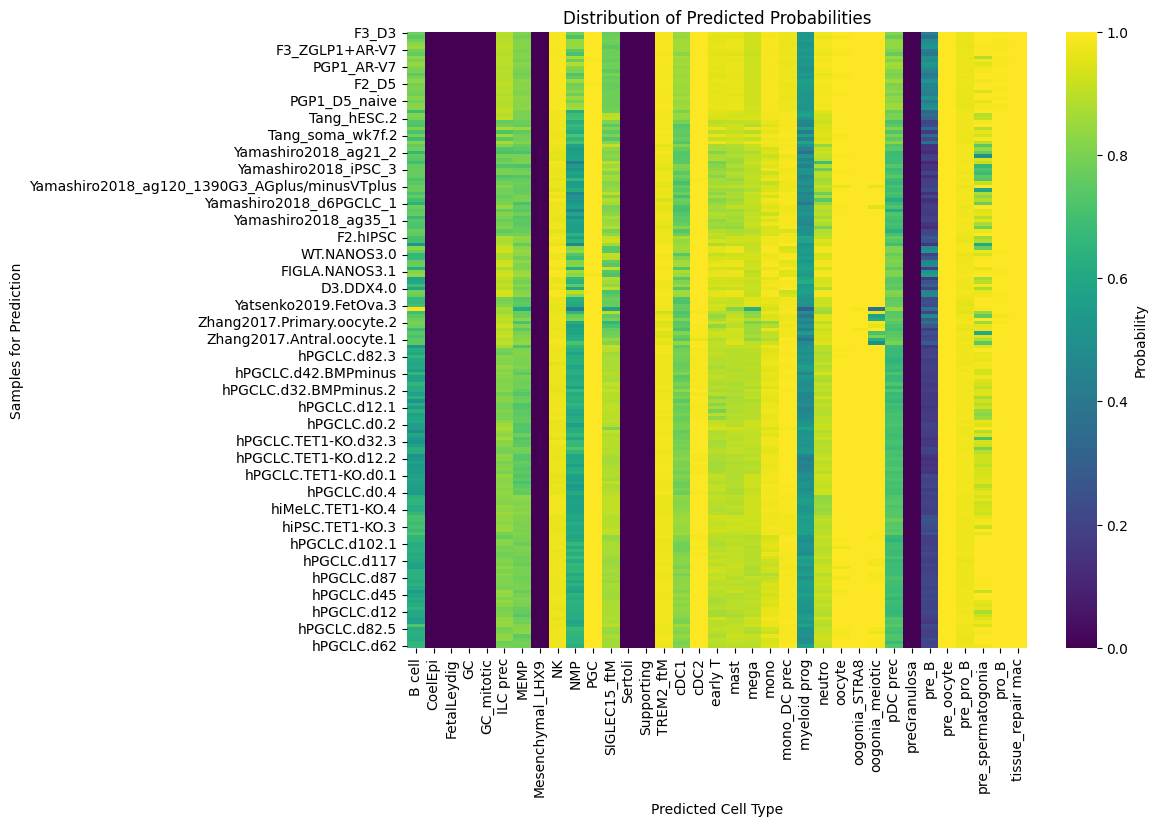

In [112]:
df_to_heat(mat=heat_df,
           color_map='viridis',
           x_axis='Predicted Cell Type',
           y_axis='Samples for Prediction',
           title='Distribution of Predicted Probabilities',
           cbar_label = 'Probability',
           save_dir = '/content/prob_celltypist_heat.png')

In [86]:
ranked_df = heat_df.copy()

for idx in range(len(heat_df)):
    ranked_row = heat_df.iloc[idx].rank(axis=0, method='dense', ascending=False).astype(int)
    ranked_df.iloc[idx] = ranked_row

ranked_df

,B cell,CoelEpi,FetalLeydig,GC,GC_mitotic,ILC prec,MEMP,Mesenchymal_LHX9,NK,NMP,...,oogonia_STRA8,oogonia_meiotic,pDC prec,preGranulosa,pre_B,pre_oocyte,pre_pro_B,pre_spermatogonia,pro_B,tissue_repair mac
F3_D3,24.0,30.0,28.0,34.0,35.0,19.0,22.0,33.0,12.0,23.0,...,3.0,4.0,21.0,32.0,27.0,2.0,15.0,7.0,9.0,1.0
F3_ZGLP1+AR-V7+ANHX,24.0,30.0,28.0,34.0,35.0,19.0,21.0,33.0,9.0,25.0,...,3.0,4.0,23.0,32.0,27.0,2.0,15.0,5.0,8.0,1.0
F3_ZGLP1,24.0,30.0,28.0,34.0,35.0,19.0,23.0,33.0,11.0,21.0,...,3.0,4.0,22.0,32.0,27.0,2.0,15.0,8.0,9.0,1.0
F3_AR-V7,23.0,30.0,28.0,34.0,35.0,19.0,24.0,33.0,9.0,21.0,...,3.0,4.0,22.0,32.0,27.0,2.0,15.0,7.0,10.0,1.0
F3_ANHX,22.0,30.0,28.0,34.0,35.0,19.0,24.0,33.0,8.0,21.0,...,3.0,4.0,23.0,32.0,27.0,1.0,17.0,9.0,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hPGCLC.d68,25.0,30.0,28.0,35.0,34.0,21.0,20.0,33.0,10.0,24.0,...,4.0,13.0,23.0,32.0,27.0,3.0,11.0,9.0,5.0,1.0
hPGCLC.d72,25.0,30.0,28.0,35.0,34.0,21.0,22.0,33.0,12.0,24.0,...,4.0,6.0,23.0,32.0,27.0,3.0,13.0,7.0,5.0,1.0
hPGCLC.d76,25.0,30.0,28.0,35.0,34.0,20.0,22.0,33.0,12.0,24.0,...,4.0,9.0,23.0,32.0,27.0,3.0,13.0,5.0,7.0,1.0
hPGCLC.d82.6,24.0,30.0,28.0,34.0,35.0,22.0,21.0,33.0,11.0,25.0,...,4.0,9.0,23.0,32.0,27.0,3.0,13.0,6.0,5.0,2.0


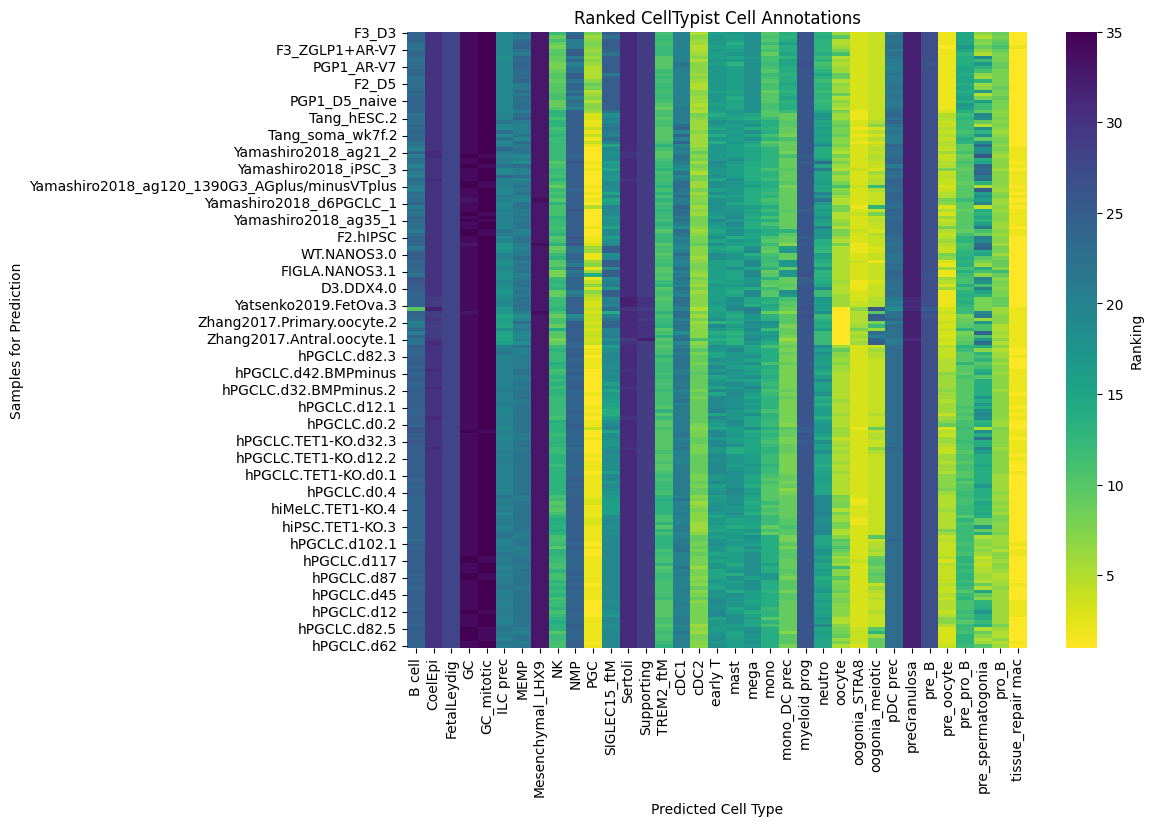

In [114]:
df_to_heat(mat=ranked_df,
           color_map='viridis_r',
           x_axis='Predicted Cell Type',
           y_axis='Samples for Prediction',
           title='Ranked CellTypist Cell Annotations',
           cbar_label = 'Ranking',
           save_dir = '/content/ranked_celltypist_heat.png')